<a href="https://colab.research.google.com/github/SayantikaSaha9/Data-science-projects/blob/main/Precision_Pay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
current_path = os.getcwd()
print(f"Current path: {current_path}")


Current path: /content


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


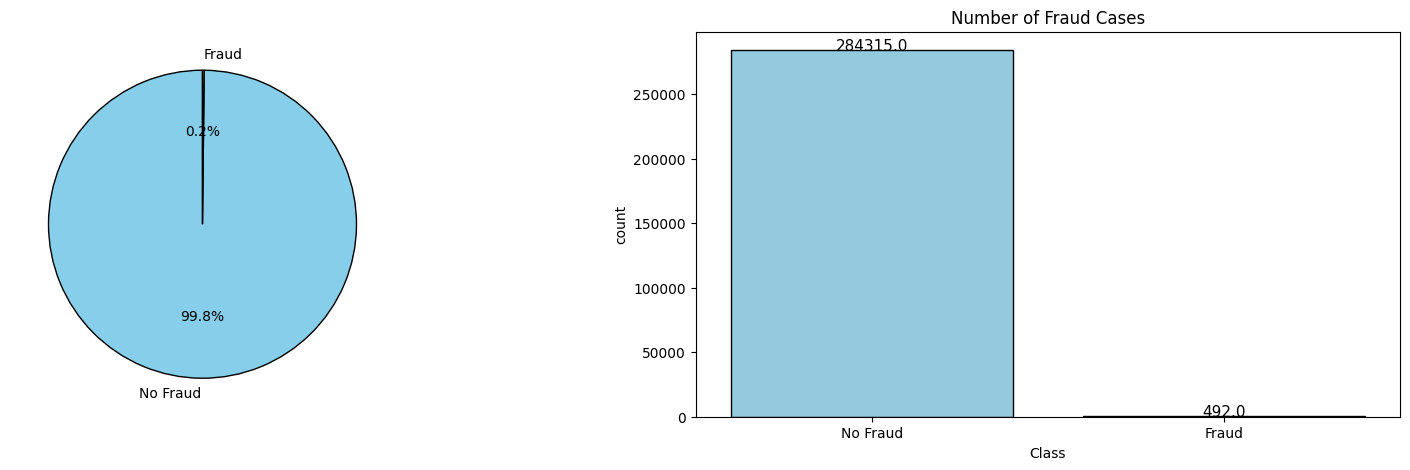

In [ ]:
fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud, fraud]

colors = ['skyblue', 'orange']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.pie(
    fraud_percentage,
    labels=['No Fraud', 'Fraud'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)

plt.subplot(1, 2, 2)
ax = sns.countplot(x='Class', data=df, edgecolor='black', palette=colors)  # 'x' eklendi
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height() + 2,
        rect.get_height(),
        horizontalalignment='center',
        fontsize=11
    )
ax.set_xticklabels(['No Fraud', 'Fraud'])
plt.title('Number of Fraud Cases')

plt.show()

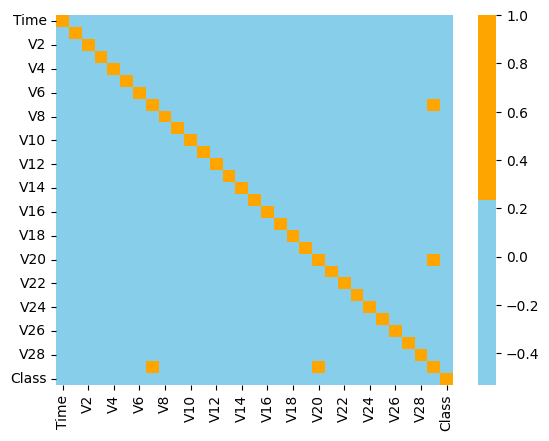

In [ ]:
# Correlation Matrix

sns.heatmap(df.corr(),cmap = colors, cbar = True);

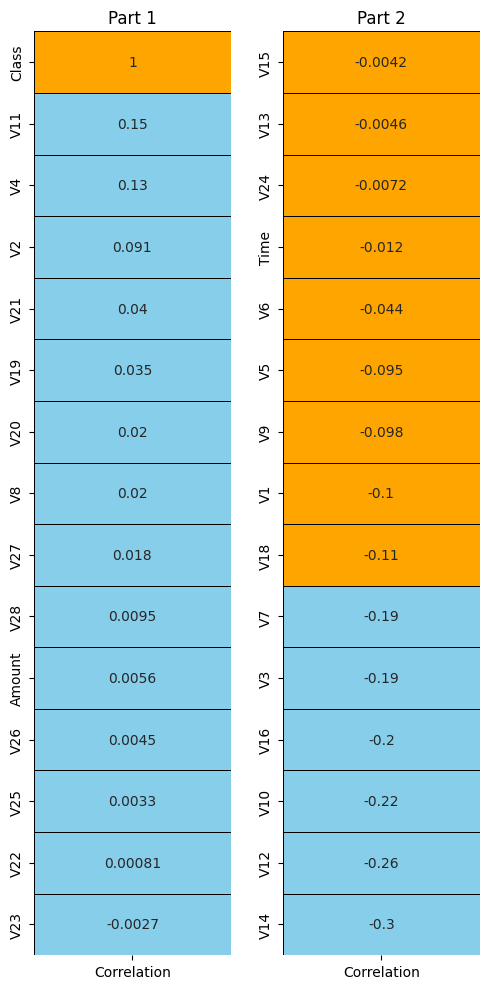

In [ ]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

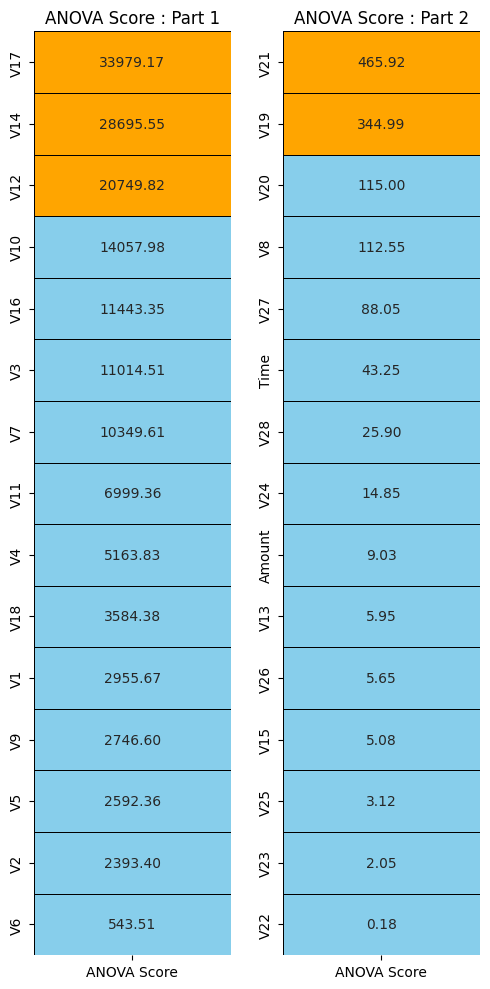

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = df.loc[:,:'Amount']
target = df.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

In [ ]:
# Dataset for Model based on Correlation Plot
df1 = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


In [ ]:
# Dataset for Model based on ANOVA Score
df2 = df.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


In [ ]:
X1 = df1.drop("Class", axis= 1)
y1 = df1.Class

X2 = df2.drop("Class", axis= 1)
y2 = df2.Class

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, stratify= y1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, stratify= y2, random_state=42)

Before OverSampling, counts of label '1': 369
Before OverSampling, counts of label '0': 213236 

After OverSampling, the shape of train_x: (426472, 9)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


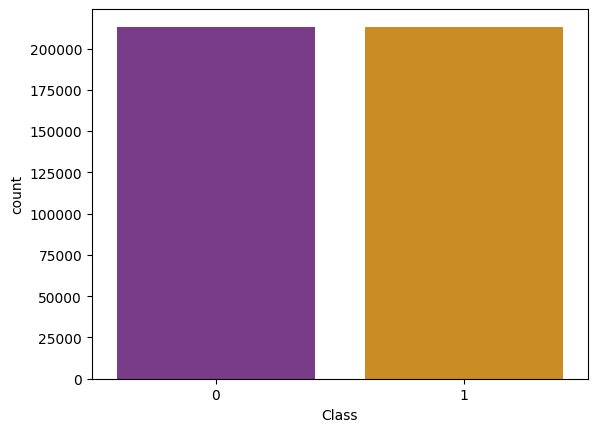

In [ ]:
#For df1
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y1_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y1_train==0)))

sm = SMOTE(random_state=42)
X1_train_sm, y1_train_sm = sm.fit_resample(X1_train, y1_train)

print('After OverSampling, the shape of train_x: {}'.format(X1_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_sm.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y1_train_sm==1)/len(y1_train_sm)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y1_train_sm==0)/len(y1_train_sm)*100.0,2))

sns.countplot(x=y1_train_sm, data=df1, palette='CMRmap');

Before OverSampling, counts of label '1': 369
Before OverSampling, counts of label '0': 213236 

After OverSampling, the shape of train_x: (426472, 20)
After OverSampling, the shape of train_y: (426472,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


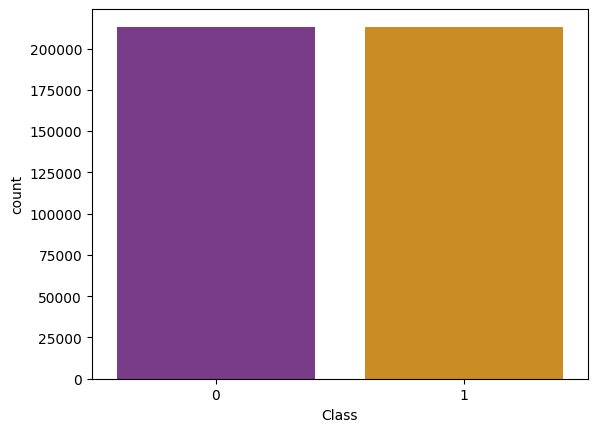

In [ ]:
# FOR df2

from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y2_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y2_train==0)))

sm2 = SMOTE(random_state=42)
X2_train_sm, y2_train_sm = sm.fit_resample(X2_train, y2_train)

print('After OverSampling, the shape of train_x: {}'.format(X2_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y2_train_sm.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y2_train_sm==1)/len(y2_train_sm)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y2_train_sm==0)/len(y2_train_sm)*100.0,2))

sns.countplot(x=y2_train_sm, data=df2, palette='CMRmap');

In [ ]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [ ]:
def result (model, X1_train_sm, y1_train_sm, X1_test, y1_test):
    a = model()
    a.fit(X1_train_sm, y1_train_sm)
    y_pred = a.predict(X1_test)
    cnf_matrix = confusion_matrix(y1_test, y_pred)
    print()
    metrics(y1_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    y_pred_prob = a.predict_proba(X1_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y1_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()


Accuracy: 0.99614
Precision: 0.29121
Recall: 0.86179
F1-score: 0.43532


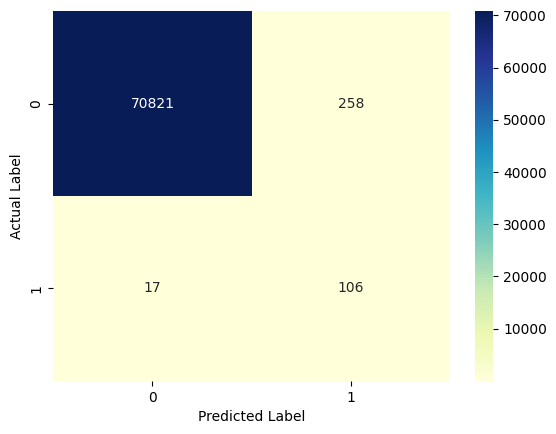

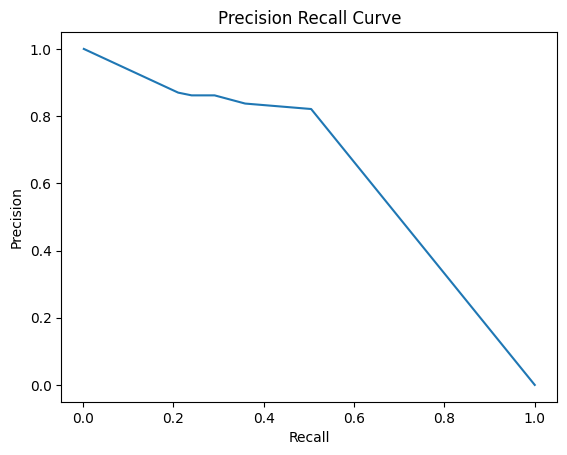

In [ ]:
# For df1

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix

result(KNeighborsClassifier, X1_train_sm, y1_train_sm, X1_test, y1_test)


Accuracy: 0.99794
Precision: 0.44915
Recall: 0.86179
F1-score: 0.59053


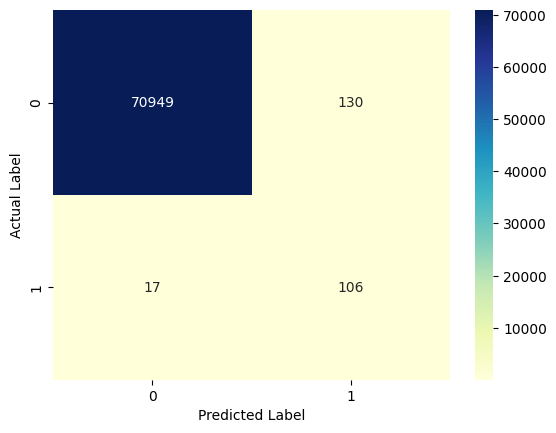

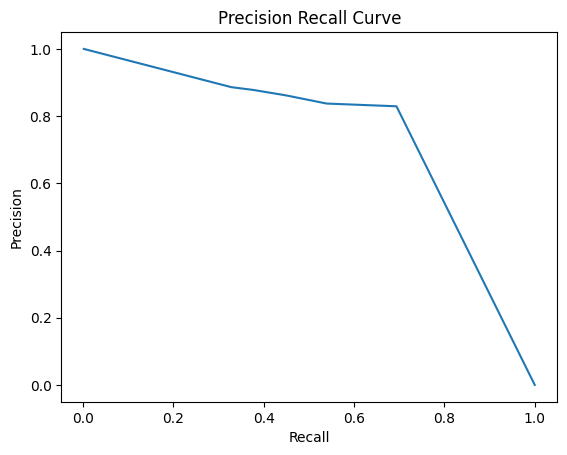

In [ ]:
# For df2

result(KNeighborsClassifier, X2_train_sm, y2_train_sm, X2_test, y2_test)


Accuracy: 0.99893
Precision: 0.65772
Recall: 0.79675
F1-score: 0.72059


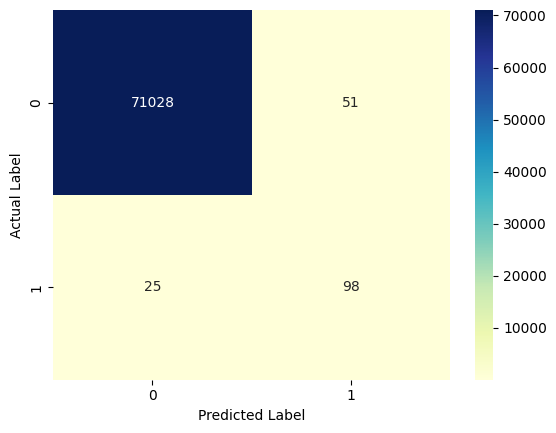

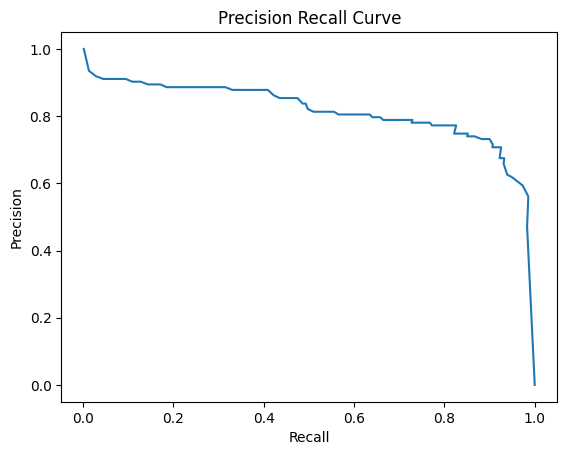

In [ ]:
# For df1

result(RandomForestClassifier, X1_train_sm, y1_train_sm, X1_test, y1_test)


Accuracy: 0.99935
Precision: 0.80800
Recall: 0.82114
F1-score: 0.81452


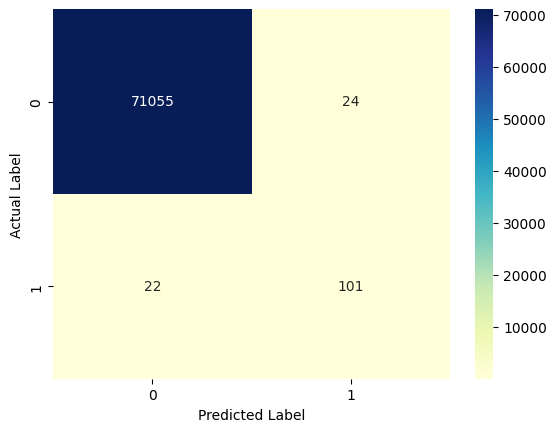

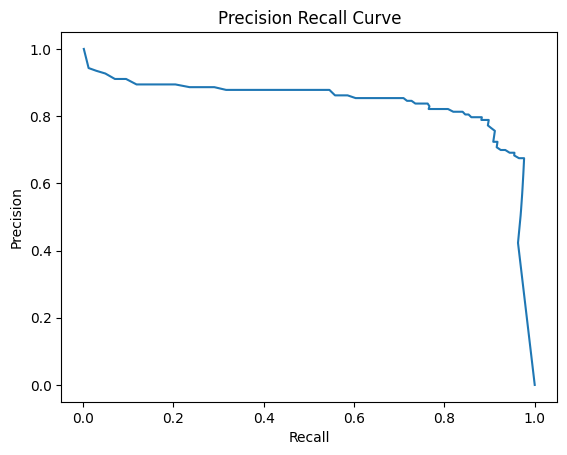

In [ ]:
# For df2

result(RandomForestClassifier, X2_train_sm, y2_train_sm, X2_test, y2_test)


Accuracy: 0.99735
Precision: 0.37687
Recall: 0.82114
F1-score: 0.51662


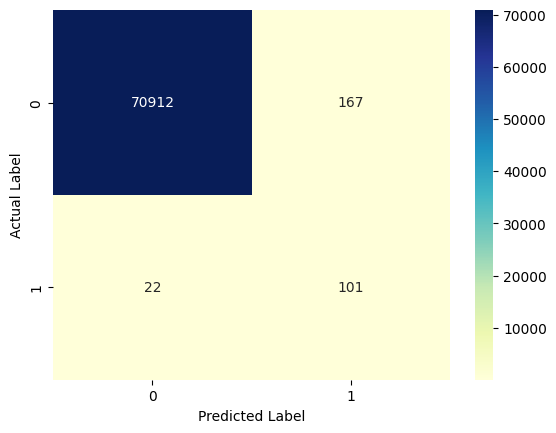

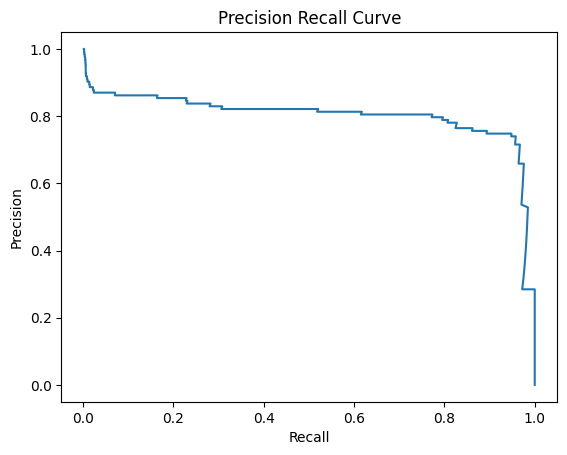

In [ ]:
# For df1

result(XGBClassifier, X1_train_sm, y1_train_sm, X1_test, y1_test)


Accuracy: 0.99893
Precision: 0.64417
Recall: 0.85366
F1-score: 0.73427


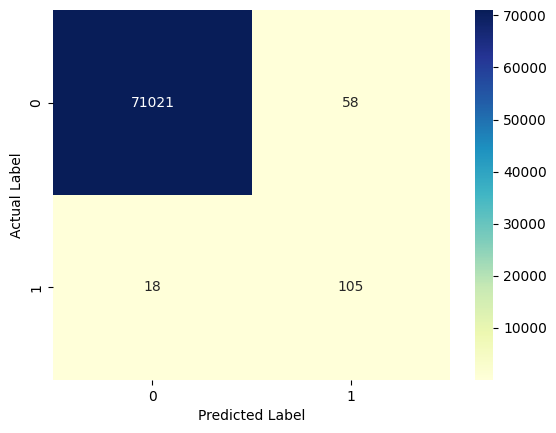

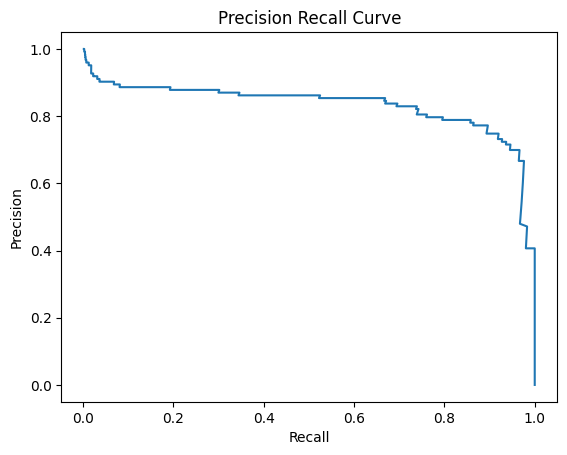

In [ ]:
# For df2

result(XGBClassifier, X2_train_sm, y2_train_sm, X2_test, y2_test)


Accuracy: 0.97221
Precision: 0.05342
Recall: 0.90244
F1-score: 0.10086


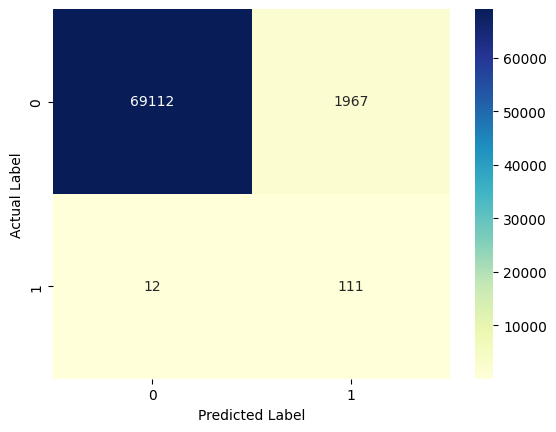

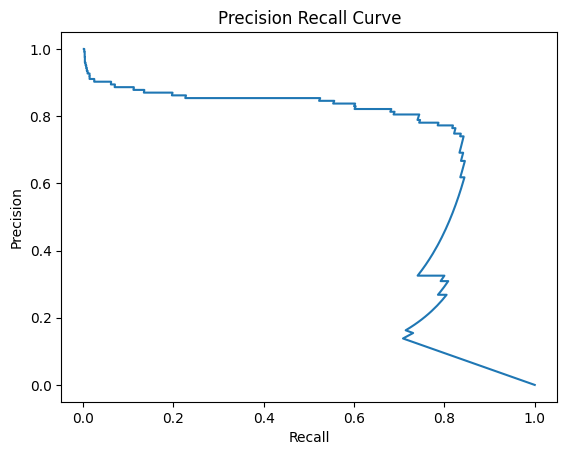

In [ ]:
# For df1
result(LogisticRegression, X1_train_sm, y1_train_sm, X1_test, y1_test)


Accuracy: 0.97326
Precision: 0.05497
Recall: 0.89431
F1-score: 0.10358


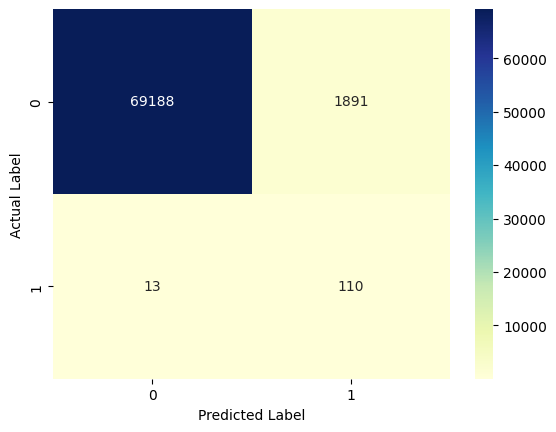

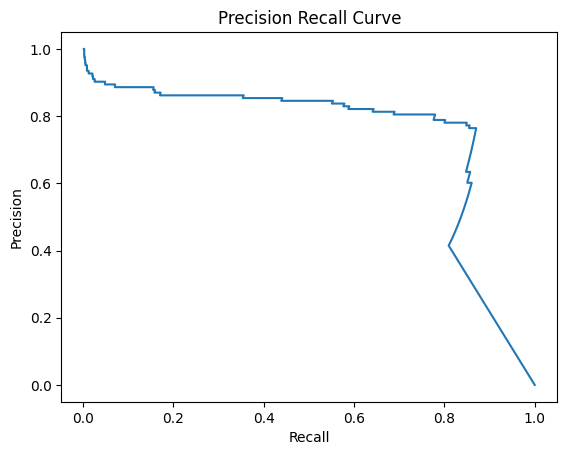

In [ ]:
# For df2
result(LogisticRegression, X2_train_sm, y2_train_sm, X2_test, y2_test)